In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [12]:
x = pd.read_csv("./data/0_x.csv", header=None)
y = pd.read_csv("./data/0_y.csv", header=None)
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [13]:
x.shape, y.shape

((387, 5), (387, 1))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_

array([[95.52010745]])

In [61]:
binary.predict(x[[1]])[:5], y[:5]

(array([[ 81.7066754 ],
        [-40.45008468],
        [-24.60472955],
        [-78.92903986],
        [-82.26167214]]),
             0
 0   63.320498
 1  -23.426394
 2   11.982771
 3 -102.883304
 4  -49.373475)

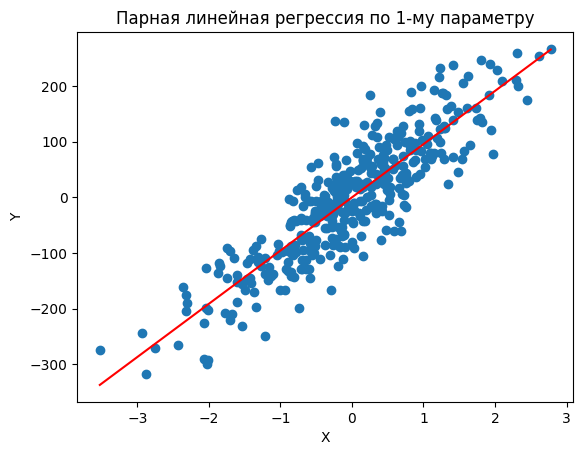

In [17]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1,1))
plt.plot(xx, binary.predict(xx), c='r')
plt.title("Парная линейная регрессия по 1-му параметру")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [18]:
binary.score(x[[1]], y)

0.7699743283650629

In [65]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

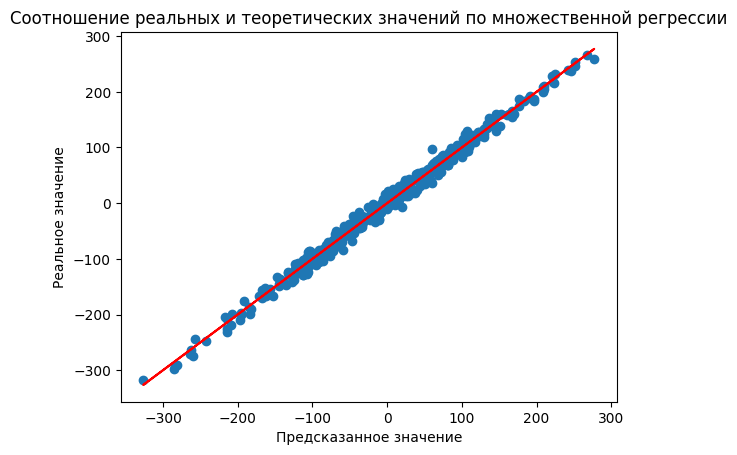

In [20]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.xlabel("Предсказанное значение")
plt.ylabel("Реальное значение")
plt.plot(yy, yy, c='r')
plt.title("Соотношение реальных и теоретических значений по множественной регрессии")
plt.show()

Самостоятельные задания
1. Сравните коэффициенты парной и множественной регрессии до и после обучения. 

In [21]:
print("binary model coef:", binary.coef_)
print("multiple model coefs:", multiple.coef_)

binary model coef: [[95.52010745]]
multiple model coefs: [[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]


2. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [22]:
binary_0 = LinearRegression()
binary_0.fit(x[[0]], y)
print("Coef binary_0:", binary_0.coef_[0][0])

Coef binary_0: 22.7811134205866


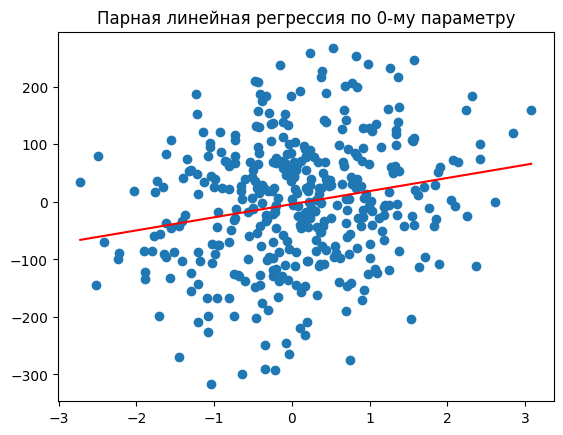

In [23]:
plt.scatter(x[[0]], y)
xx_0 = np.linspace(x[0].min(), x[0].max(), num=100, endpoint=True).reshape((-1,1))
plt.plot(xx_0, binary_0.predict(xx_0), 'r')
plt.title("Парная линейная регрессия по 0-му параметру")
plt.show()

In [24]:
binary_2 = LinearRegression()
binary_2.fit(x[[2]], y)
print("Coef binary_2:", binary_2.coef_[0][0])

Coef binary_2: 46.94897635119021


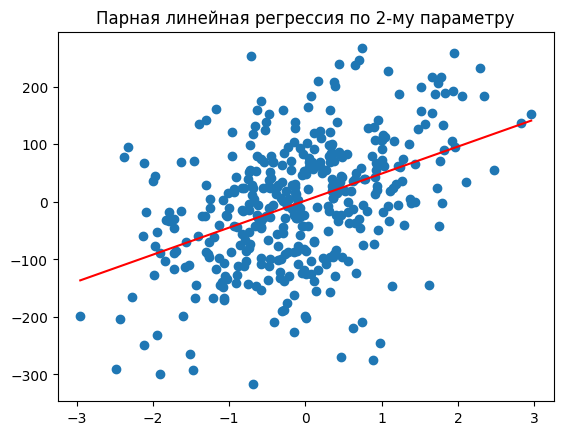

In [25]:
plt.scatter(x[[2]], y)
xx_2 = np.linspace(x[2].min(), x[2].max(), num=100, endpoint=True).reshape((-1,1))
plt.plot(xx_2, binary_2.predict(xx_2), 'r')
plt.title("Парная линейная регрессия по 2-му параметру")
plt.show()

In [26]:
binary_3 = LinearRegression()
binary_3.fit(x[[3]], y)
print("Coef binary_3:", binary_3.coef_[0][0])

Coef binary_3: 23.998824072824334


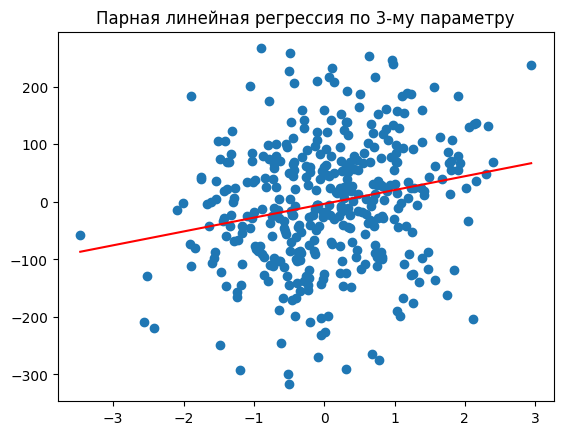

In [27]:
plt.scatter(x[3], y)
xx_3 = np.linspace(x[3].min(), x[3].max(), num=100, endpoint=True).reshape((-1,1))
plt.plot(xx_3, binary_3.predict(xx_3), 'r')
plt.title("Парная линейная регрессия по 3-му параметру")
plt.show()

In [28]:
binary_4 = LinearRegression()
binary_4.fit(x[[4]], y)
print("Coef binary_4:", binary_4.coef_[0][0])

Coef binary_4: 1.4908204197891677


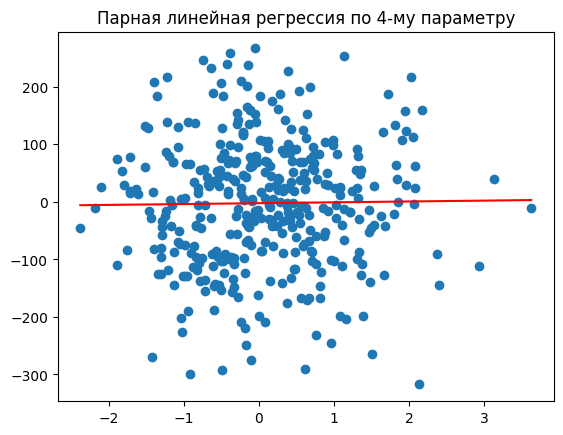

In [29]:
plt.scatter(x[4], y)
xx_4 = np.linspace(x[4].min(), x[4].max(), num=100, endpoint=True).reshape((-1,1))
plt.plot(xx_4, binary_4.predict(xx_4), 'r')
plt.title("Парная линейная регрессия по 4-му параметру")
plt.show()

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [30]:
x = pd.read_csv("./data/0_x.csv", header=None)
y = pd.read_csv("./data/0_y.csv", header=None)
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [31]:
x.shape, y.shape

((387, 5), (387, 1))

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [128]:
def Process_polynomic_regression(degree: int, x_data: pd.DataFrame, y_data: pd.DataFrame):
    scores = []
    maes = []
    rmses = []
    for i in range(0, len(x_data.columns)):

        # Обучение
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(x[[i]])

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly, y)

        # Предсказание и график
        linespace = np.linspace(x[0].min(), x[i].max(), num=len(y_data), endpoint=True).reshape((-1,1))
        linespace_poly = poly_features.transform(linespace)

        plt.scatter(x[[i]], y)
        plt.title(f'Полиномиальная регрессия {degree} порядка для {i} признака')
        plt.xlabel("Признак")
        plt.ylabel("Значение")
        plt.plot(linespace, poly_reg.predict(linespace_poly), 'r')
    
        # Метрики
        Y_true = y_data
        Y_predict = poly_reg.predict(poly_features.transform(x[[i]]))

        score = r2_score(y_data, Y_predict)
        #score = poly_reg.score(poly_features.transform(x[[i]]), y_data)
        print(f'R2_Score {round(score, 4)}')
        scores.append(score)

        mae = mean_absolute_error(Y_true, Y_predict)
        print(f'MAE metric: {round(mae, 3)}')
        maes.append(mae)

        rmse = mean_squared_error(Y_true, Y_predict)
        print(f'RMSE metric: {round(rmse, 3)}')
        rmses.append(rmse)

        plt.show()
    return scores, maes, rmses


R2_Score 0.0437
MAE metric: 85.779
RMSE metric: 11491.909


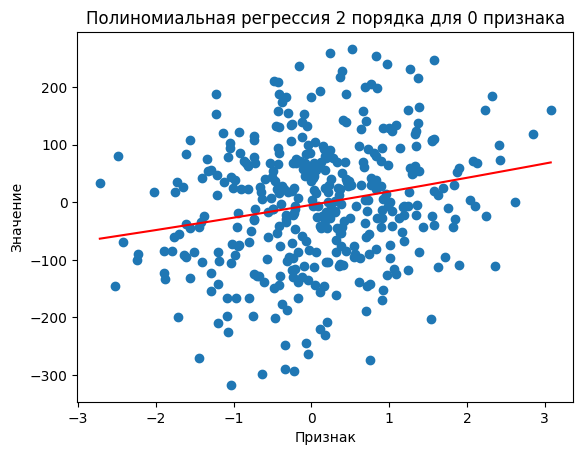

R2_Score 0.77
MAE metric: 42.132
RMSE metric: 2763.91


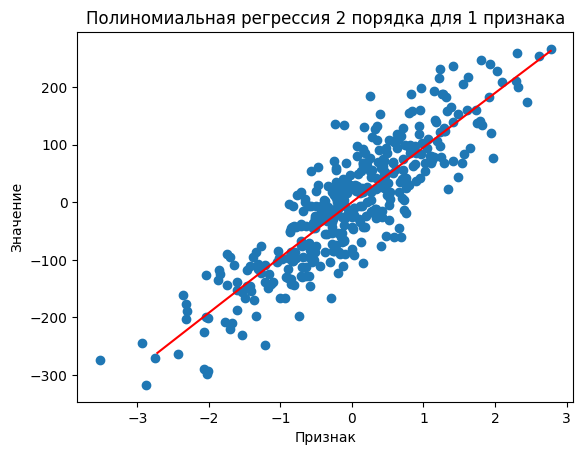

R2_Score 0.19
MAE metric: 77.458
RMSE metric: 9733.432


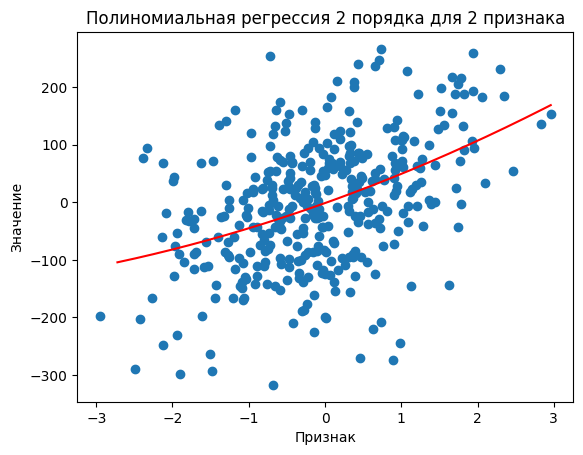

R2_Score 0.0479
MAE metric: 83.447
RMSE metric: 11440.588


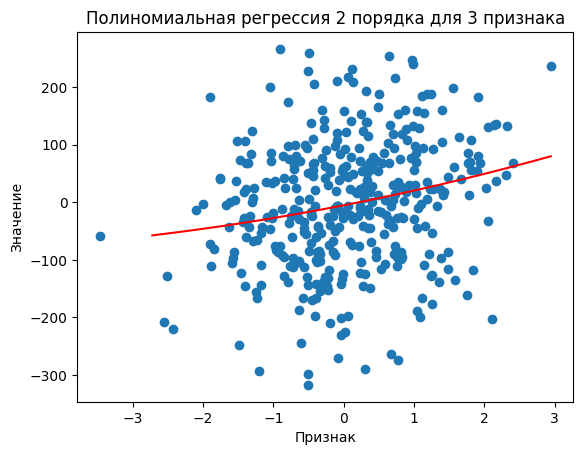

R2_Score 0.001
MAE metric: 87.232
RMSE metric: 12004.093


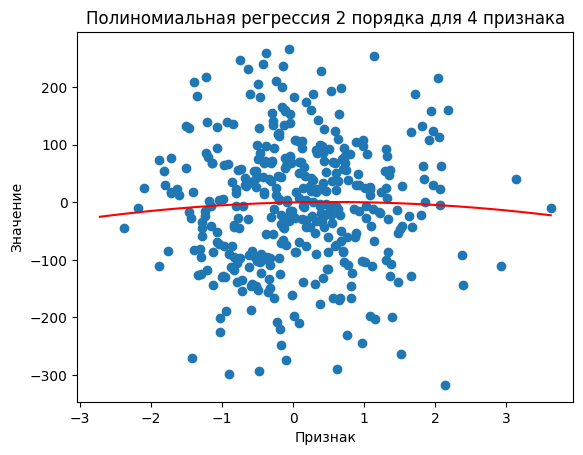

In [129]:
s1, m1, r1 = Process_polynomic_regression(2, x, y)

R2_Score 0.0438
MAE metric: 85.684
RMSE metric: 11490.787


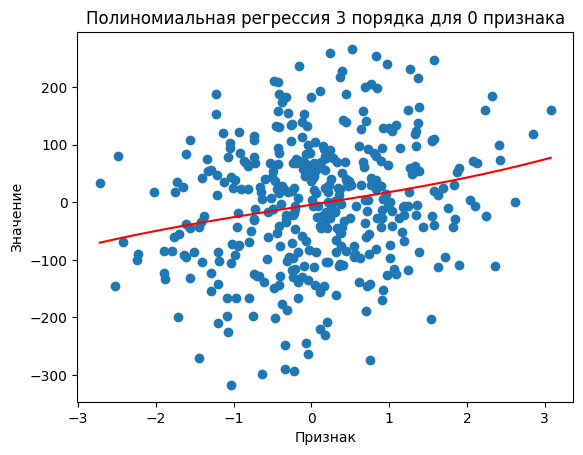

R2_Score 0.7711
MAE metric: 42.061
RMSE metric: 2750.401


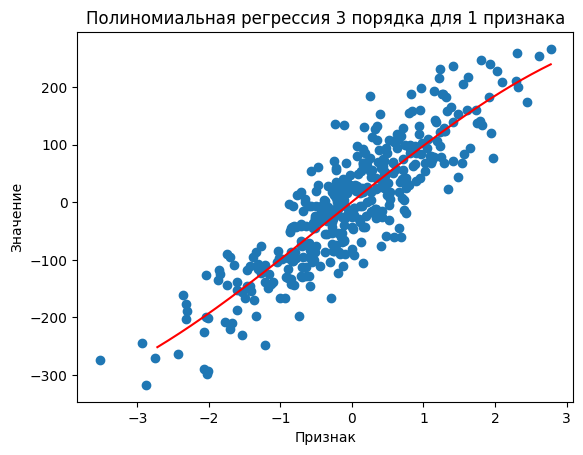

R2_Score 0.1928
MAE metric: 77.57
RMSE metric: 9699.86


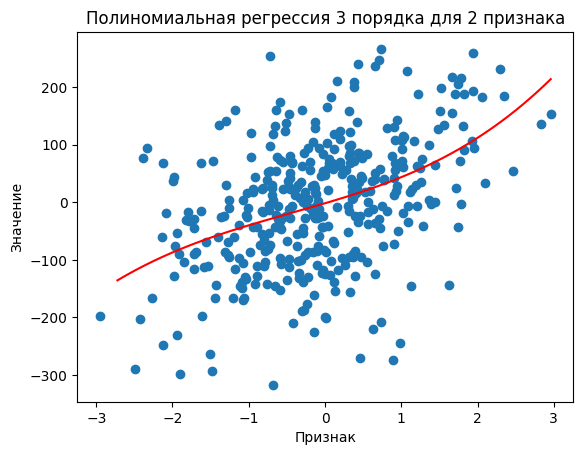

R2_Score 0.0503
MAE metric: 83.444
RMSE metric: 11412.119


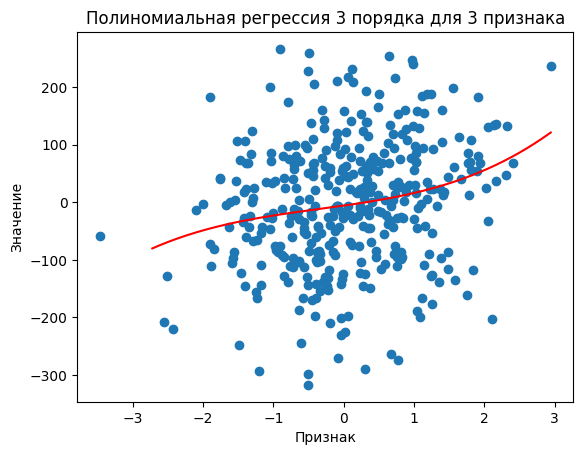

R2_Score 0.0011
MAE metric: 87.224
RMSE metric: 12003.906


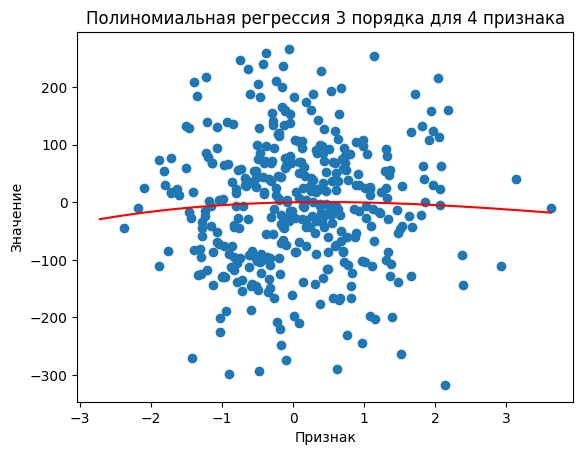

In [130]:
s2, m2, r2 =Process_polynomic_regression(3, x, y)

R2_Score 0.0504
MAE metric: 84.854
RMSE metric: 11411.587


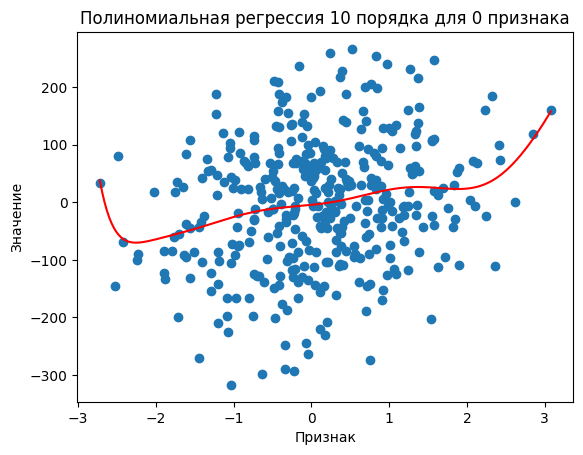

R2_Score 0.7727
MAE metric: 41.691
RMSE metric: 2731.673


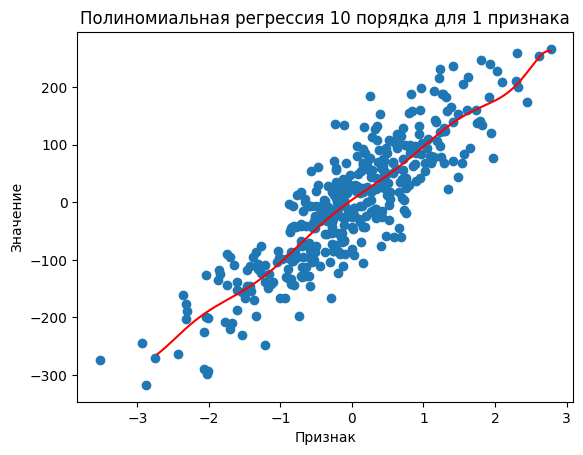

R2_Score 0.2044
MAE metric: 76.815
RMSE metric: 9560.372


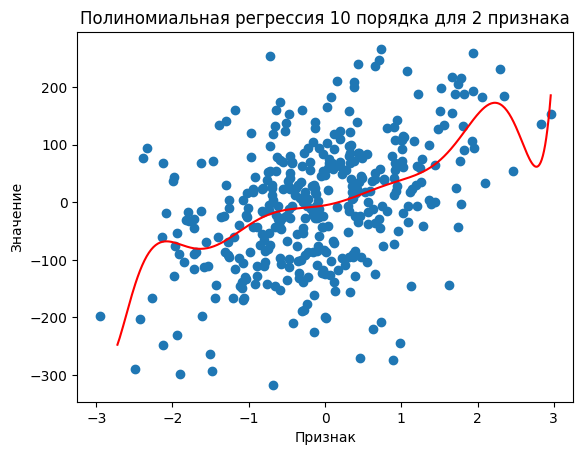

R2_Score 0.0727
MAE metric: 82.134
RMSE metric: 11143.476


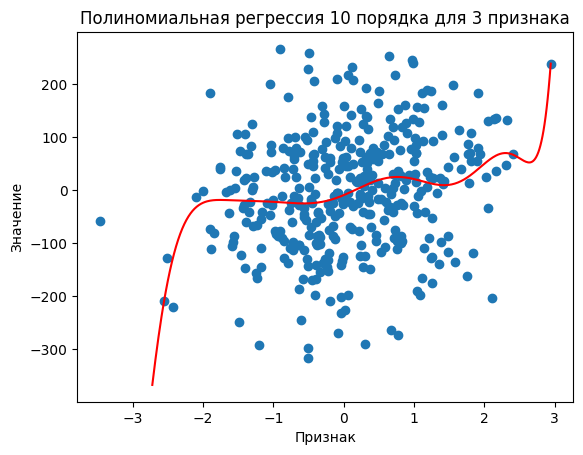

R2_Score 0.0451
MAE metric: 84.796
RMSE metric: 11475.315


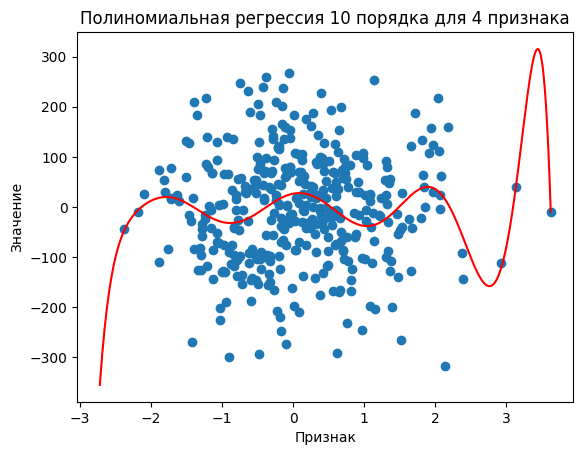

In [131]:
s3, m3, r3 =Process_polynomic_regression(10, x, y)


Данный пример нам показывает, что применение линейной регрессии не всегда достаточно для описания зависимостей данных. Особенно, когда данные имеют непостоянную структуру и выбросы, имеет смысл применить полиномиальную регрессию, так как она посзволяет описать нелинейные функции, которые задают данные. Однако, в этом вопросе необходимо найти золотую середину, так как при большой степени полинома модель может хорошо описывать одни данные, но другие уже будет не способна 

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [132]:
columns = ["Тип модели","Score", "MAE", "RMSE"]
binary_models_score = [r2_score(y, binary_0.predict(x[[0]])),
                       r2_score(y, binary.predict(x[[1]])),
                       r2_score(y, binary_2.predict(x[[2]])),
                       r2_score(y, binary_3.predict(x[[3]])),
                       r2_score(y, binary_4.predict(x[[4]]))]
binamry_models_mae = [mean_absolute_error(y, binary_0.predict(x[[0]])),
                      mean_absolute_error(y, binary.predict(x[[1]])),
                      mean_absolute_error(y, binary_2.predict(x[[2]])),
                      mean_absolute_error(y, binary_3.predict(x[[3]])),
                      mean_absolute_error(y, binary_4.predict(x[[4]]))]
binamry_models_rmse = [mean_squared_error(y, binary_0.predict(x[[0]])),
                      mean_squared_error(y, binary.predict(x[[1]])),
                      mean_squared_error(y, binary_2.predict(x[[2]])),
                      mean_squared_error(y, binary_3.predict(x[[3]])),
                      mean_squared_error(y, binary_4.predict(x[[4]]))]

model_names = ["Парная линейная регрессия по 0 признаку",
               "Парная линейная регрессия по 1 признаку",
               "Парная линейная регрессия по 2 признаку",
               "Парная линейная регрессия по 3 признаку",
               "Парная линейная регрессия по 4 признаку",


               "Полином. регрессия 2 порядка по 0 приз.",
               "Полином. регрессия 2 порядка по 1 приз.",
               "Полином. регрессия 2 порядка по 2 приз.",
               "Полином. регрессия 2 порядка по 3 приз.",
               "Полином. регрессия 2 порядка по 4 приз.",
               
               "Полином. регрессия 3 порядка по 0 приз.",
               "Полином. регрессия 3 порядка по 1 приз.",
               "Полином. регрессия 3 порядка по 2 приз.",
               "Полином. регрессия 3 порядка по 3 приз.",
               "Полином. регрессия 3 порядка по 4 приз.",
               
               "Полином. регрессия 10 порядка по 0 приз.",
               "Полином. регрессия 10 порядка по 1 приз.",
               "Полином. регрессия 10 порядка по 2 приз.",
               "Полином. регрессия 10 порядка по 3 приз.",
               "Полином. регрессия 10 порядка по 4 приз.",]

metrics_table = pd.DataFrame({"Тип модели": model_names,
                              "R2_Score": binary_models_score+s1+s2+s3,
                              "MAE": binamry_models_mae+m1+m2+m3,
                              "RMSE": binamry_models_rmse+r1+r2+r3})

In [126]:
metrics_table

,Тип модели,Score,MAE,RMSE
0,Парная линейная регрессия по 0 признаку,0.043643,85.765870,11492.249825
1,Парная линейная регрессия по 1 признаку,0.769974,42.131562,2764.149252
2,Парная линейная регрессия по 2 признаку,0.187945,77.411837,9758.217057
3,Парная линейная регрессия по 3 признаку,0.047470,83.586779,11446.262118
4,Парная линейная регрессия по 4 признаку,0.000172,87.197397,12014.634966
5,Полином. регрессия 2 порядка по 0 приз.,0.043672,85.778988,11491.909255
6,Полином. регрессия 2 порядка по 1 приз.,0.769994,42.132303,2763.909753
7,Полином. регрессия 2 порядка по 2 приз.,0.190008,77.458415,9733.431563
8,Полином. регрессия 2 порядка по 3 приз.,0.047943,83.446884,11440.588266
9,Полином. регрессия 2 порядка по 4 приз.,0.001049,87.232040,12004.093016


Как видно из полученных метрик, обученные лишь на одном из нескольких признаков модели не лучшим образом показывают себя, о чем свидетельствуют большие значения в оценках MAE и RMSE, хотя присутствуют записи, где r2 метрика достигает значение 0.7, что достаточно хорошо.

Рассмотрим отдельно обученные модели на всех признаках и оценим их метрики

In [103]:
# Множественная регрессия
multiple_reg_all = LinearRegression()
multiple_reg_all.fit(x, y)
y_predict_multiple_all = multiple_reg_all.predict(x)
# Метрики множественной регрессии
r2_score_multiple = r2_score(y, y_predict_multiple_all)
mae_multiple = mean_absolute_error(y, y_predict_multiple_all)
rmse_multiple = mean_squared_error(y, y_predict_multiple_all)

In [113]:
def process_polynom_regression_all_params(x_data: pd.DataFrame, y_data: pd.DataFrame, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Загружаем все признаки
    x_poly = poly_features.fit_transform(x_data)
    # Обучение
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly, y_data)
    prediction = poly_reg.predict(x_poly)
    # Метрики
    score = r2_score(y_data, prediction)
    mae = mean_absolute_error(y_data, prediction)
    rmse = mean_squared_error(y_data, prediction)
    return score, mae, rmse

In [124]:
r2_score_all_params = []
mae_all_params = []
rmse_all_params = []
r2_score_all_params.append(round(r2_score_multiple,5))
mae_all_params.append(round(mae_multiple,5))
rmse_all_params.append(round(rmse_multiple,5))
degrees = [2,3,10]
for i in degrees:
    score, mae, rmse = process_polynom_regression_all_params(x, y, i)
    r2_score_all_params.append(round(score,5))
    mae_all_params.append(round(mae,5))
    rmse_all_params.append(round(rmse,5))

models_name = ["Множественная регрессия", 
               "Полином. регрессия 2 степени",
               "Полином. регрессия 3 степени",
               "Полином. регрессия 10 степени"]

metrics_table_all_params = pd.DataFrame({"Тип модели": models_name,
                                         "r2_score": r2_score_all_params,
                                         "mae": mae_all_params,
                                         "rmse": rmse_all_params})

metrics_table_all_params

,Тип модели,r2_score,mae,rmse
0,Множественная регрессия,0.99222,7.78068,93.49229
1,Полином. регрессия 2 степени,0.99260,7.55336,88.91857
2,Полином. регрессия 3 степени,0.99319,7.09585,81.80684
3,Полином. регрессия 10 степени,1.00000,0.00000,0.00000


Из представленных выше метрик на разных обученных моделях можно сказать, что увеличение колчества признаков в обучающей выборке значительно улучшает предективные способности модели, об этом может сказать r2 метрика, которая показывает насколько соответствует модель тем данным, которые были даны ей. Также применение полиномиальной регрессии дает возможность описывать модели более сложные функции, о чем также свидетельствуют метрики r2, mae и rmse при обучении по всем параметрам. Конечно, в обучении все зависит и от самих данных и насколько часто там встречаются выбросы, потому что они значительно влияют на оценку RMSE, которая в своем расчете имеет квадрат. 

Рассмотрим вариант разбиения данных на обучающую и тестовую выборку

In [134]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

In [141]:
# Разбиение на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

# Множестввенная регрессия
mult_reg_all = LinearRegression()
mult_reg_all.fit(x_train, y_train)
y_pred_test_mult_reg_all = mult_reg_all.predict(x_test)
# Метрики
r2_score_mult_reg_all = r2_score(y_test, y_pred_test_mult_reg_all)
mae_multiple = mean_absolute_error(y_test, y_pred_test_mult_reg_all)
rmse_multiple = mean_squared_error(y_test, y_pred_test_mult_reg_all)

In [142]:
def process_polynom_regression_all_params_split_data(x_data: pd.DataFrame, y_data: pd.DataFrame, degree):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=22)

    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Загружаем все признаки
    x_poly = poly_features.fit_transform(x_train)
    # Обучение
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly, y_train)
    # Предсказание
    x_test_poly = poly_features.transform(x_test)
    prediction = poly_reg.predict(x_test_poly)
    # Метрики
    score = r2_score(y_test, prediction)
    mae = mean_absolute_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction)
    return score, mae, rmse

In [147]:
r2_score_all_params = []
mae_all_params = []
rmse_all_params = []
r2_score_all_params.append(round(r2_score_mult_reg_all))
mae_all_params.append(round(mae_multiple))
rmse_all_params.append(round(rmse_multiple))
degrees = [2,3,10]
for i in degrees:
    score, mae, rmse = process_polynom_regression_all_params_split_data(x, y, i)
    r2_score_all_params.append(round(score))
    mae_all_params.append(round(mae))
    rmse_all_params.append(round(rmse))

models_name = ["Множественная регрессия", 
               "Полином. регрессия 2 степени",
               "Полином. регрессия 3 степени",
               "Полином. регрессия 10 степени"]

metrics_table_all_params = pd.DataFrame({"Тип модели (разделенные обуч.данные)": models_name,
                                         "r2_score": r2_score_all_params,
                                         "mae": mae_all_params,
                                         "rmse": rmse_all_params})

metrics_table_all_params

,Тип модели (разделенные обуч.данные),r2_score,mae,rmse
0,Множественная регрессия,1,8,104
1,Полином. регрессия 2 степени,1,8,106
2,Полином. регрессия 3 степени,1,8,120
3,Полином. регрессия 10 степени,-7174,3651,112659767


При разделенных данных на обучающие и тестовые можно увидеть, чтобы все модели хорошо обучились на исключением полиномиальной регрессии 10 степени, так как она переобучилась и все метрики приняли большие значения.

Построим графики кривых обучения и тесторования в зависимости от размера обучающей выборки.

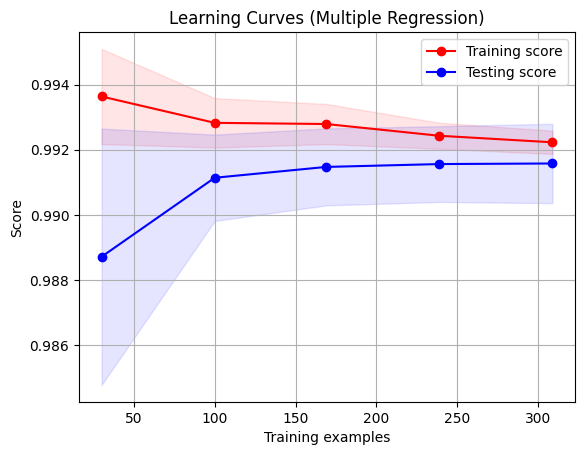

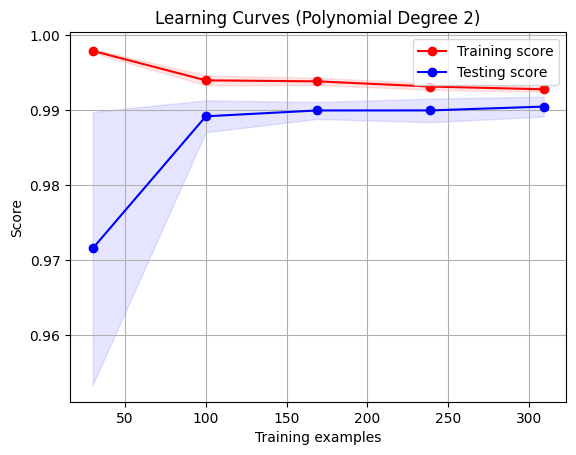

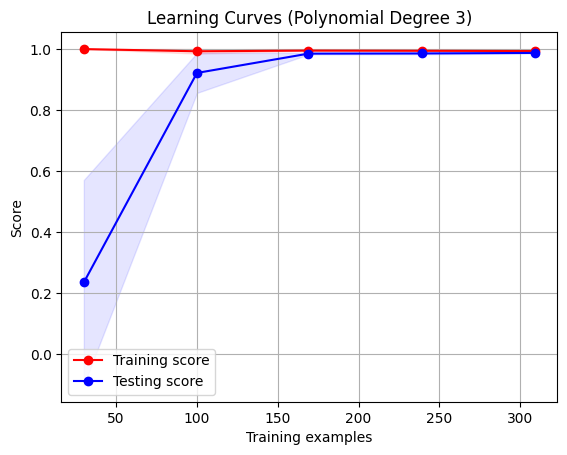

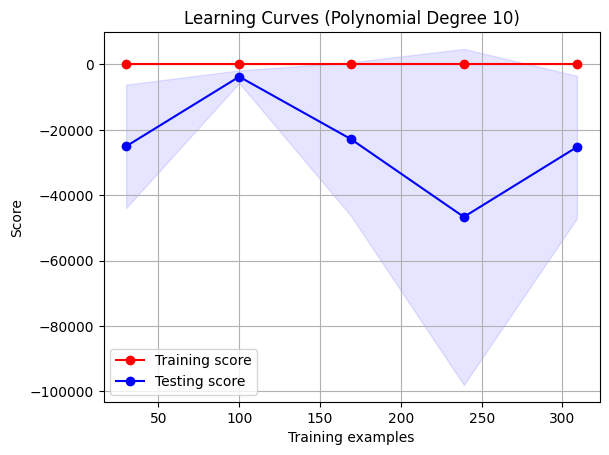

In [160]:
# Функция построения кривых обучения
def plot_learning_curve(estimator, title, X, y):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")   
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Testing score")

    plt.legend(loc="best")
    return plt

multiple_reg_plts = LinearRegression()

title = "Learning Curves (Multiple Regression)"
plot_learning_curve(multiple_reg_plts, title, x, y)
plt.show()

for degree in degrees:
    title = f"Learning Curves (Polynomial Degree {degree})"
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(x)
    plot_learning_curve(LinearRegression(), title, X_poly, y)
    plt.show()

Из графиков видно влияние объема обучающих данных на точность работы модели. Если кривые находятся близко друг к другу и остаются близко, то это означает, что модель обучается хорошо и работает правильно как на обучающем наборе, так и на проверочном. То есть модель не переобучается и, возможно, дополнительные данные для обучения не привнесут особых улучшений.

Контрольные вопросы
1. **Как должны выглядеть данные для модели машинного обучения?**

Для обучения модели используются два параметра: матрица признаков (X) и вектор целевых значений (Y). Матрица признаков содержит информацию о различных признаках или переменных, которые могут использоваться для прогнозирования целевой переменной. Вектор целевых переменных содержит значения, которые обученная модель должна предсказать на основе предоставленных признаков.

2. **В чем физический смысл коэфициентов линейной регрессии?**

Коэфициенты представляют самой значимость или вес того или иного парметра/признака на результат выходного значения. В общем говоря это коэфициенты неизвестных в многочлене функции целевого значения.

3. **Чем множественная регрессия отличается от парной?**

В парной регресии используется только один признак для обучения и предсказания целевого значения. В то время как в множественной используется целый набор признаков, где каждый из них вности разный вклад в результируюее предсказание целевого значения.

4. **Какую функцию ошибки использует модель линейной регрессии?**

Функцию средней квадратичной ошибки (MSE) равной сумме квадратов разности целевого значения и предсказанного, деленного на число значений.

5. **Какие метрики эффективности можно применять для оценки регрессионных моделей?**
 - R-квадрат (R^2) - коэффициент детерминации, который измеряет объясненную дисперсию в данных моделью.
 - Среднеквадратичная ошибка (MSE) - измеряет среднеквадратичное отклонение между предсказанными значениями и фактическими значениями.
 - Средняя абсолютная ошибка (MAE) - измеряет среднее абсолютное отклонение между предсказанными значениями и фактическими значениями.
 - Корень из среднеквадратичной ошибки (RMSE) - это корень из MSE и измеряет среднеквадратичное отклонение в исходных единицах измерения.

6. **Какие еще регрессоры есть в библиотеке sklearn?**

Например, LinearRegression, Ridge, Lasso, ElasticNet.

7. **Почему для визуализации модели нельзя использовать предсказанные значения по датасету?**

Потому что это не покажет объективную оценку обученной модели, так как будут использованы данные, которые модель уже "видела". Для это лучше использовать тестовые данные, на которые модель будет проверена.

